In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
%matplotlib inline
sess = tf.Session()

/home/huzeyfekiran/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [116]:
#load iris data
iris = datasets.load_iris()
binary_target = (iris.target==0).astype(int)
iris_2d = iris.data[:, 2:4]

In [117]:
#declare data and variables 
batch_size = 10
x1_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype =tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [118]:
#define the linear model
my_mult = tf.matmul(x2_data,A)
my_add = tf.add(my_mult,b)
my_output = tf.subtract(x1_data,my_add)

In [119]:
#loss function
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output,labels=y_target)

In [120]:
#optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [121]:
#initalize variables
init = tf.initialize_all_variables()
sess.run(init)

In [122]:
#train
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size = batch_size)
    rand_x = iris_2d[rand_index].reshape(batch_size,2)
    rand_x1 = rand_x[:,0].reshape(batch_size,1)
    rand_x2 = rand_x[:,1].reshape(batch_size,1)
    rand_y = binary_target[rand_index].reshape(batch_size,1)
    sess.run(train_step, feed_dict={x1_data:rand_x1, x2_data:rand_x2, y_target: rand_y})
    if(i+1)%200==0:
        print('Step # ' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step # 200 A = [[7.263963]], b = [[-2.43403]]
Step # 400 A = [[8.654594]], b = [[-3.491815]]
Step # 600 A = [[9.54673]], b = [[-4.197262]]
Step # 800 A = [[10.145628]], b = [[-4.7305584]]
Step # 1000 A = [[10.65229]], b = [[-5.1643367]]


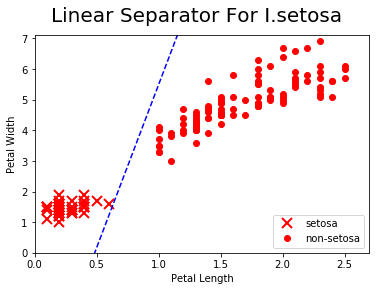

In [123]:
#plot
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)
x = np.linspace(0,3,num=50)
ablineValues = []
for i in x:
    ablineValues.append(slope*i+intercept)
setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] ==1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] ==1]
non_setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] ==0]
non_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] ==0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2,label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label = 'non-setosa')
plt.plot(x, ablineValues, 'b--')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa',fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()